In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\user\projects\customer_behaviour_dataset\Customer_Segmentation\E-commerce Customer Behavior - Sheet1.csv")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [ ]:
# Data Cleaning Steps 

# Count NaN values per column
na_count = df.isna().sum()

#Since only Satisfaction level has NA - fill with Neutral 
df["Satisfaction Level"] = df["Satisfaction Level"].fillna("Neutral")


In [34]:
# Encoding the categorical values and creating a copy to observe correlation numbers
# One-hot encode selected columns
encoded_df = pd.get_dummies(
    df,
    columns=["Membership Type", "Satisfaction Level", "Gender", "Discount Applied"],
    drop_first=False   # set True if you want to avoid multicollinearity
)


In [35]:
encoded_df.columns

Index(['Customer ID', 'Age', 'City', 'Total Spend', 'Items Purchased',
       'Average Rating', 'Days Since Last Purchase', 'Membership Type_Bronze',
       'Membership Type_Gold', 'Membership Type_Silver',
       'Satisfaction Level_Neutral', 'Satisfaction Level_Satisfied',
       'Satisfaction Level_Unsatisfied', 'Gender_Female', 'Gender_Male',
       'Discount Applied_False', 'Discount Applied_True'],
      dtype='object')

In [36]:
df_numeric = encoded_df[['Age','Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase','Membership Type_Bronze',
       'Membership Type_Gold', 'Membership Type_Silver',
       'Satisfaction Level_Neutral', 'Satisfaction Level_Satisfied',
       'Satisfaction Level_Unsatisfied', 'Gender_Female', 'Gender_Male',
       'Discount Applied_False', 'Discount Applied_True']]
corr = df_numeric.corr()

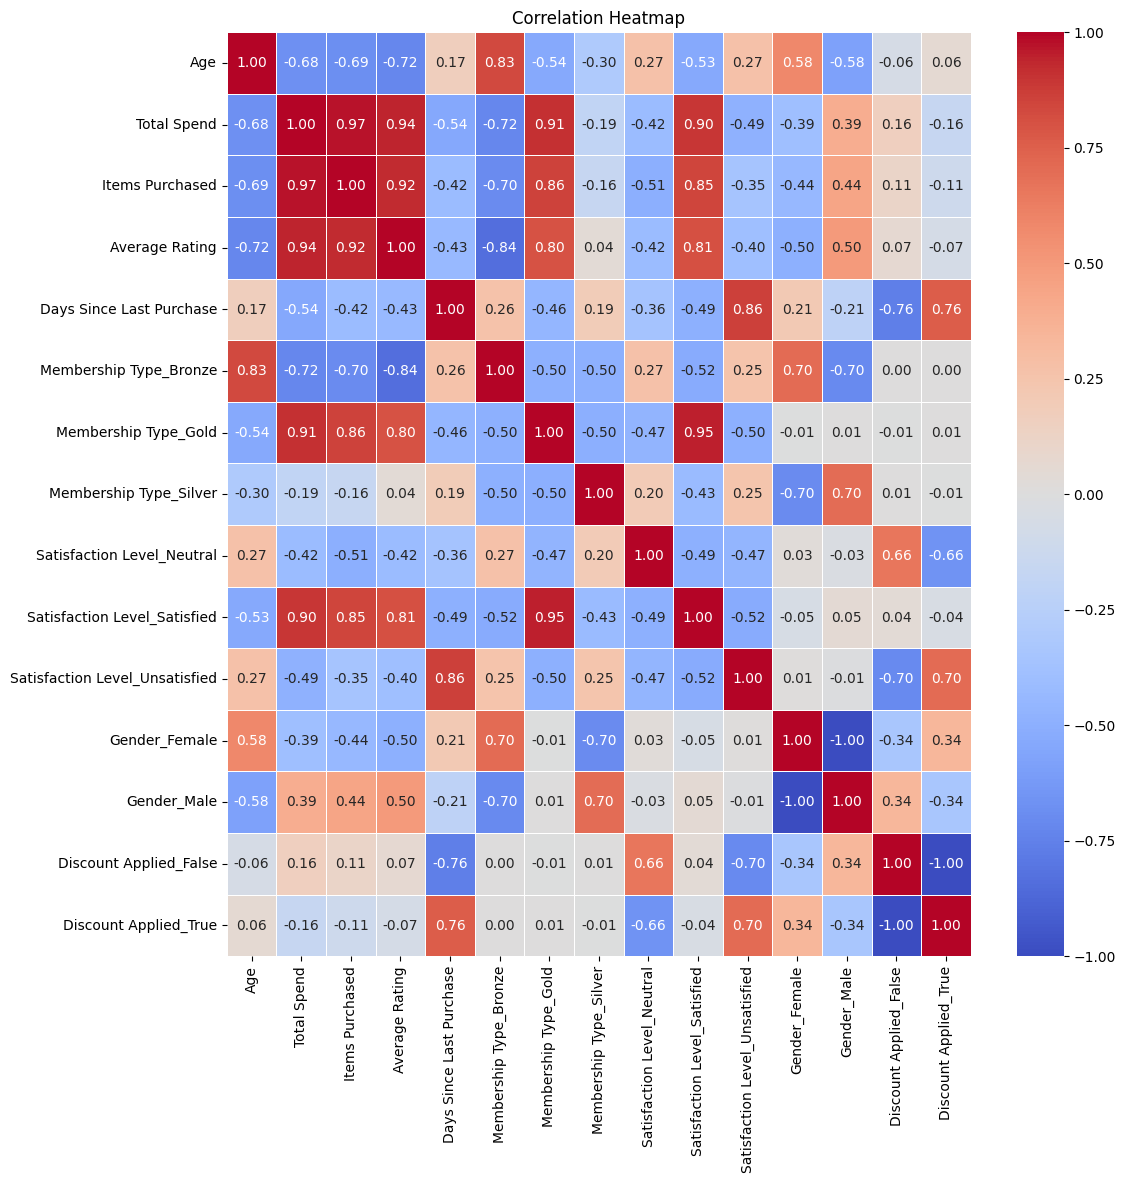

In [39]:
# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()